# __Rank Salary based on Positions__

`Source`: https://www.kaggle.com/datasets/taseermehboob9/salary-dataset-of-business-levels/data

In this dataset we have 3 columns and ten rows and its about a Company where we will see the levels and how much salary is offered by the company for each level. (__Multi-Linear Regression__)

__Basic Steps:__

1. Import the relevant packages.
2. Import the dataset.
3. Check the head and tail portion of the dataset and also the dataset info, also work on NAN values like removing them or imputing them with appropriate values.
4. Handle Categorical data using One-Hot encoding or Label Encoder.
5. Separate the feature and target variables (`X` and `y`) by performing a vertical split on the dataset.
6. Split the data into training and testing data (`X_train`, `y_train`, `X_test`, `y_test`) by performing a horizontal split on the dataset.
  

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

# Import necessary libraries for performance metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import the PolynomialFeatures class from scikit-learn's preprocessing module
from sklearn.preprocessing import PolynomialFeatures

In [98]:
salary_data = pd.read_csv("rank_salary.csv")
salary_data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000


In [100]:
salary_data.columns

Index(['Position', 'Level ', 'Salary'], dtype='object')

In [102]:
salary_data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000
8,C.level,9,250000
9,CEO,10,1000000


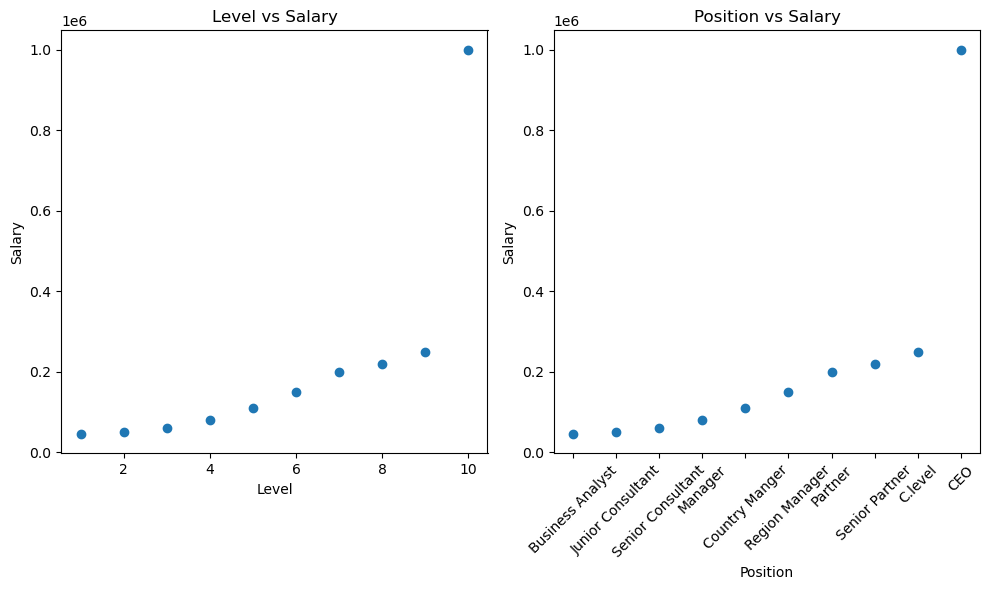

In [104]:
# Visualise the Multi-variable data using subplot
# Checking the distribution of data

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.scatter(salary_data['Level '], salary_data['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level vs Salary')

plt.subplot(1, 2, 2)
plt.scatter(salary_data['Position'], salary_data['Salary'])
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Position vs Salary')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [105]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


##### __Observations:__

- Here there are no null values.
- `Position` is a categorial variable for which we need to create dummy variables.

In [109]:
salary_data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,216500.000000
std,3.02765,285054.088435
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,215000.000000
max,10.00000,1000000.000000


In [111]:
# Handle categorical data using Label Encoder (Needs a 1D array)

label_encoder = LabelEncoder()
label_encoder.fit_transform(salary_data['Position'])

array([0, 4, 8, 5, 3, 7, 6, 9, 1, 2])

In [113]:
salary_data['Position']

0     Business Analyst
1    Junior Consultant
2    Senior Consultant
3              Manager
4       Country Manger
5       Region Manager
6              Partner
7       Senior Partner
8              C.level
9                  CEO
Name: Position, dtype: object

In [115]:
salary_data[['Position']]

,Position
0,Business Analyst
1,Junior Consultant
2,Senior Consultant
3,Manager
4,Country Manger
5,Region Manager
6,Partner
7,Senior Partner
8,C.level
9,CEO


In [117]:
# Handle categorical data using One-Hot Encoding (Needs a 2D array)

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit_transform(salary_data[['Position']])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [119]:
salary_data = pd.get_dummies(salary_data, dtype='int', prefix='op')
salary_data

,Level,Salary,op_Business Analyst,op_C.level,op_CEO,op_Country Manger,op_Junior Consultant,op_Manager,op_Partner,op_Region Manager,op_Senior Consultant,op_Senior Partner
0,1,45000,1,0,0,0,0,0,0,0,0,0
1,2,50000,0,0,0,0,1,0,0,0,0,0
2,3,60000,0,0,0,0,0,0,0,0,1,0
3,4,80000,0,0,0,0,0,1,0,0,0,0
4,5,110000,0,0,0,1,0,0,0,0,0,0
5,6,150000,0,0,0,0,0,0,0,1,0,0
6,7,200000,0,0,0,0,0,0,1,0,0,0
7,8,220000,0,0,0,0,0,0,0,0,0,1
8,9,250000,0,1,0,0,0,0,0,0,0,0
9,10,1000000,0,0,1,0,0,0,0,0,0,0


In [121]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Level                 10 non-null     int64
 1   Salary                10 non-null     int64
 2   op_Business Analyst   10 non-null     int64
 3   op_C.level            10 non-null     int64
 4   op_CEO                10 non-null     int64
 5   op_Country Manger     10 non-null     int64
 6   op_Junior Consultant  10 non-null     int64
 7   op_Manager            10 non-null     int64
 8   op_Partner            10 non-null     int64
 9   op_Region Manager     10 non-null     int64
 10  op_Senior Consultant  10 non-null     int64
 11  op_Senior Partner     10 non-null     int64
dtypes: int64(12)
memory usage: 1.1 KB


In [123]:
# Alternate code for dropping Salary column from the dataframe

X = salary_data.drop(columns = 'Salary')
X.head()

,Level,op_Business Analyst,op_C.level,op_CEO,op_Country Manger,op_Junior Consultant,op_Manager,op_Partner,op_Region Manager,op_Senior Consultant,op_Senior Partner
0,1,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,0
3,4,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,0


In [125]:
# X = salary_data.drop(["Salary"], axis = 1)
# X.head()

In [127]:
y = salary_data["Salary"]
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

### __Perform Non-Linear(Polynomial) Regression on the dataset to create the model__

__Next Steps:__

1. Create PolynomialFeatures features transformer object with degree 4.
2. Create new feature set using `fit_transform` on `X_train` which is `X_train_poly`.
3. Apply the same transformation (feature set) on `X_test` which is `X_test_poly`.
4. Create an instance/object of the LinearRegression class.
5. Fit the model on the transformed training data `X_train_poly` and `y_train`.ar
6. Create a variable `X_range` to create a continuous range of values for the independent variable (X) that spans from the minimum to the maximum values found in both the training and test datasets.
7. Visualize the fitted data using a scatter plot (using test set data).
8. Find the model output parameters - intercept and the slope of the line.

In [8]:
poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X)

NameError: name 'PolynomialFeatures' is not defined

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 42)

In [133]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7
3
7
3


In [141]:
X_train[0]

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [145]:
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [70]:
# X_range = np.arange(min(np.min(X_train), np.min(X_test)), max(np.max(X_train), np.max(X_test)), 0.1)
# X_range = X_range.reshape((len(X_range), 1))
# X_range[:5]

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4]])

In [147]:
# Slope of the curved line (4 degrees)
poly_model.coef_

array([ 1.55523594e-10, -1.21098932e+04,  4.80982729e+03,  7.27595761e-12,
        3.51372113e+03, -1.72892584e+03,  0.00000000e+00, -1.29636784e+03,
       -2.09826007e+03,  0.00000000e+00, -4.12189315e+02, -2.78780535e+03,
        7.27291885e+03,  4.80982729e+03,  0.00000000e+00,  3.51372113e+04,
       -8.64462918e+03,  0.00000000e+00, -5.18547137e+03, -1.46878205e+04,
        0.00000000e+00, -1.23656794e+03, -2.23024428e+04,  4.80982729e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.51372113e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.72892584e+03,  0.00000000e+00,
        0.00000000e+00,  

In [149]:
# Intercept
poly_model.intercept_

35407.49252282639

#### __Need to find the training and testing accuracy of the model__

__Next Steps:__

1. Get the predicted values (`y_train_pred`) of training data `y_train` based on `X_train` values for the __Training Phase__.
2. Calculate the Mean Square Error (MSE) by comparing the `y_train_pred` and `y_train` values for the __Training Phase__.
3. Calculate the R-Squared Score (r2 score) by comparing the `y_train_pred` and `y_train` values for the __Training Phase__.
4. Get the predicted values (`y_test_pred`) of test data `y_test` based on `X_test` values for the __Testing/Inferencing Phase__.
2. Calculate the Mean Square Error (MSE) by comparing the `y_test_pred` and `y_test` values for the __Testing Phase__.
3. Calculate the R-Squared Score (r2 score) by comparing the `y_test_pred` and `y_test` values for the __Testing Phase__.

In [151]:
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

In [153]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

4.895396667479541e-20

In [155]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

1.0

In [157]:
mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

25386372124.311855

In [159]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

-2.807955818646778

In [174]:
poly_reg_model_params_df = pd.DataFrame([[mse_train, r2_train], [mse_test, r2_test]], columns = ["MSE", "R Squared"], index = ["Train", "Test"])
poly_reg_model_params_df

,MSE,R Squared
Train,4.895397e-20,1.000000
Test,2.538637e+10,-2.807956


#### __Observations__

- Since value of MSE for test and train data and value for R-squared score is negative, in this case Linear Regression is not the correct model for prediction.